In [1]:
import random
import LDPC_Gauss
import matplotlib.pyplot as plt
import importlib
importlib.reload(LDPC_Gauss)
import numpy as np

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
ldpc = LDPC_Gauss.LDPC(99, 6, 9)
canalGauss = LDPC_Gauss.CanalGauss(2)
v = [0]*99
r = canalGauss.canal(v)
c = [0 if r[i] >= 0 else 1 for i in range(len(r))]
L = canalGauss.LLR(r)

In [4]:
len_n = 100000
def generate1MBits():
    return [random.randint(0, 1) for _ in range(len_n)]

def split_into_Nbit_subvectors(bits, N):
    subvectors = []
    for i in range(0, len(bits)-N, N):
        subvectors.append(bits[i:i+N])
    return subvectors

In [9]:
bits = generate1MBits()
subvectorsLDPC = split_into_Nbit_subvectors(bits, 1008)
dbs = [0.05*i for i in range(101)]
cerros = []
ldpcerros = []

In [44]:
n = 99
s = 2000
ldpc = LDPC_Gauss.LDPC(99, 6, 9)
undecodedErros = []
for db in dbs:
    err = 0
    for k in range(s):
        canalGauss = LDPC_Gauss.CanalGauss(10**(db/10))
        v = [0]*n
        r = canalGauss.canal(v)
        c = [0 if r[i] >= 0 else 1 for i in range(len(r))]
        for i in range(len(c)):
            if c[i] == 1:
                err += 1
        L = canalGauss.LLR(r)

    undecodedErros.append(err/(n*s))

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]


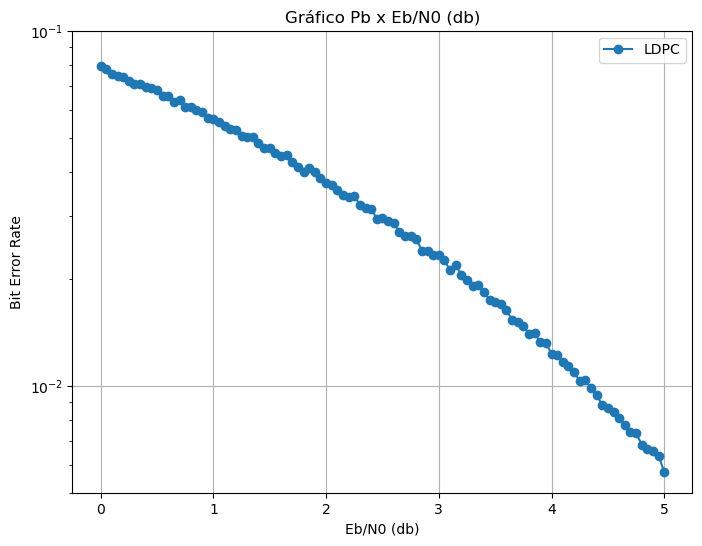

In [45]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Plotando os dados
plt.plot(dbs, undecodedErros, marker='o', label='LDPC')
plt.yscale("log") 

# Configurando o título e os rótulos dos eixos
plt.title('Gráfico Pb x Eb/N0 (db)')
plt.xlabel('Eb/N0 (db)')
plt.ylabel('Bit Error Rate')

# Adicionando a legenda
plt.legend()

# # Invertendo o eixo x
# plt.gca().invert_yaxis()
plt.ylim([0.005, 0.1])

# Exibindo o gráfico
plt.grid(True)
plt.show()